In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv
from matplotlib.dates import DateFormatter
%matplotlib inline

In [10]:
def read_data_airtemp(file = 'ELAHackathon_Datasets_2023\Hackathon Datasets\IISD-ELA Datasets\Challenge 3\IISD_ELA_Metsite_AirTemp_2015_2020.csv'):

    df = pd.read_csv(file, delimiter = ',', dtype = 'object')
    column_names = df.columns.to_list()
#print(column_names)
    keep_cols = ['activity_start_date', 'max_temp', 'min_temp', 'result_unit']

    for col in column_names:
        if col not in keep_cols:
        #print(col)
            df.drop(columns = col, axis = 'columns', inplace = True)
    df[['max_temp', 'min_temp']] = df[['max_temp', 'min_temp']].apply(pd.to_numeric)
    df['activity_start_date'] = df['activity_start_date'].apply(pd.to_datetime)
    
    return df

In [17]:
def create_plots_airtemp(df, year = None):
    df['timedelta'] = df.apply(lambda row: row.max_temp - row.min_temp, axis = 1)
    
    if year:
        sub_df = df.loc[(df['activity_start_date'].dt.year == year)]
        #sub_df[['max_temp', 'min_temp']] = sub_df[['max_temp', 'min_temp']].apply(pd.to_numeric)
        
        if not sub_df[['max_temp', 'min_temp']].isnull().values.all():
            create_scatter(sub_df, year)
            create_line(sub_df, year)
            
        elif sub_df[['max_temp', 'min_temp']].isnull().values.any():
            sub_df = sub_df[['max_temp', 'min_temp']].dropna()
            create_scatter(sub_df, year)
            create_line(sub_df, year)
            
        else:
            print("No data for the current site and parameter.")
            
        return sub_df
    
    else:
    #print(sub_df)
        df[['max_temp', 'min_temp']] = df[['max_temp', 'min_temp']].apply(pd.to_numeric)
        
        if not df[['max_temp', 'min_temp']].isnull().values.all():
            create_scatter(df, year)
            create_line(df, year)
            
        elif df[['max_temp', 'min_temp']].isnull().values.any():
            df = df[['max_temp', 'min_temp']].dropna()
            create_scatter(df, year)
            create_line(df, year)
            
        else:
            print("No data for the current site and parameter.")
            
    return df
        

def create_scatter(df, year = None):
    fig, ax = plt.subplots(figsize=(10, 10))
    ax.scatter(df['activity_start_date'], df['max_temp'], label = 'Max Temp')
    ax.scatter(df['activity_start_date'], df['min_temp'], label = 'Min Temp')
    ax.scatter(df['activity_start_date'], df['timedelta'], label = 'Temp Difference')
    unit = df['result_unit'].iloc[0]
    ax.set(xlabel="Date",
           ylabel= f"Air Temperature ({unit})",
           title=f"Plot of air temperature at IISD-ELA Meteorlogical Station")
                
    ax.grid()
    ax.legend()
            
    date_form = DateFormatter("%Y-%m")
    ax.xaxis.set_major_formatter(date_form)
    plt.show()

def create_line(df, year = None):
    fig, ax = plt.subplots(figsize=(10, 10))
    ax.plot(df['activity_start_date'], df['max_temp'], 'o-', label = 'Max Temp')
    ax.plot(df['activity_start_date'], df['min_temp'], 'o-', label = 'Min Temp')
    ax.plot(df['activity_start_date'], df['timedelta'], 'o-', label = 'Temperature Variation')
    unit = df['result_unit'].iloc[0]
    ax.set(xlabel="Date",
           ylabel= f"Air Temperature ({unit})",
           title=f"Trend of air temperature at IISD-ELA Meteorlogical Station")
                
    ax.grid()
    ax.legend()
            
    date_form = DateFormatter("%Y-%m")
    ax.xaxis.set_major_formatter(date_form)
    plt.show()

In [19]:
def create_indev_plots(df, plot_type, data_type, year = None):
    if plot_type == 'scatter':
        if data_type == 'max_temp':
            fig, ax = plt.subplots(figsize=(10, 10))
            ax.scatter(df['activity_start_date'], df['max_temp'])
            unit = df['result_unit'].iloc[0]
            ax.set(xlabel="Date",
                   ylabel= f"Max Air Temperature ({unit})",
                   title=f"Plot of maximum air temperature at IISD-ELA Meteorlogical Station")
            ax.grid()
            #ax.legend()
            
            date_form = DateFormatter("%Y-%m")
            ax.xaxis.set_major_formatter(date_form)
            plt.show()
            
        elif data_type == 'min_temp':
            fig, ax = plt.subplots(figsize=(10, 10))
            ax.scatter(df['activity_start_date'], df['min_temp'])
            unit = df['result_unit'].iloc[0]
            ax.set(xlabel="Date",
                   ylabel= f"Min Air Temperature ({unit})",
                   title=f"Plot of minimum air temperature at IISD-ELA Meteorlogical Station")
            ax.grid()
            #ax.legend()
            
            date_form = DateFormatter("%Y-%m")
            ax.xaxis.set_major_formatter(date_form)
            plt.show()
        
        elif data_type == 'temp_diff':
            fig, ax = plt.subplots(figsize=(10, 10))
            ax.scatter(df['activity_start_date'], df['timedelta'])
            unit = df['result_unit'].iloc[0]
            ax.set(xlabel="Date",
                   ylabel= f"Air Temperature Difference({unit})",
                   title=f"Plot of air temperature difference at IISD-ELA Meteorlogical Station")
            ax.grid()
            #ax.legend()
            
            date_form = DateFormatter("%Y-%m")
            ax.xaxis.set_major_formatter(date_form)
            plt.show()
            
    if plot_type == 'line':
        if data_type == 'max_temp':
            fig, ax = plt.subplots(figsize=(10, 10))
            ax.plot(df['activity_start_date'], df['max_temp'], 'o-')
            unit = df['result_unit'].iloc[0]
            ax.set(xlabel="Date",
                   ylabel= f"Max Air Temperature ({unit})",
                   title=f"Trend of maximum air temperature at IISD-ELA Meteorlogical Station")
            ax.grid()
            #ax.legend()
            
            date_form = DateFormatter("%Y-%m")
            ax.xaxis.set_major_formatter(date_form)
            plt.show()
            
        elif data_type == 'min_temp':
            fig, ax = plt.subplots(figsize=(10, 10))
            ax.plot(df['activity_start_date'], df['min_temp'], 'o-')
            unit = df['result_unit'].iloc[0]
            ax.set(xlabel="Date",
                   ylabel= f"Min Air Temperature ({unit})",
                   title=f"Trend of minimum air temperature at IISD-ELA Meteorlogical Station")
            ax.grid()
            #ax.legend()
            
            date_form = DateFormatter("%Y-%m")
            ax.xaxis.set_major_formatter(date_form)
            plt.show()
        
        elif data_type == 'temp_diff':
            fig, ax = plt.subplots(figsize=(10, 10))
            ax.plot(df['activity_start_date'], df['timedelta'], 'o-')
            unit = df['result_unit'].iloc[0]
            ax.set(xlabel="Date",
                   ylabel= f"Air Temperature Difference({unit})",
                   title=f"Trend of air temperature difference at IISD-ELA Meteorlogical Station")
            ax.grid()
            #ax.legend()
            
            date_form = DateFormatter("%Y-%m")
            ax.xaxis.set_major_formatter(date_form)
            plt.show()
            

   
    
    

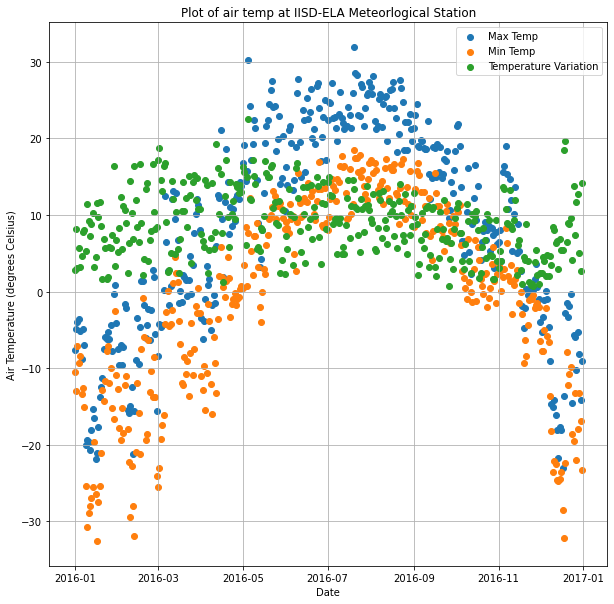

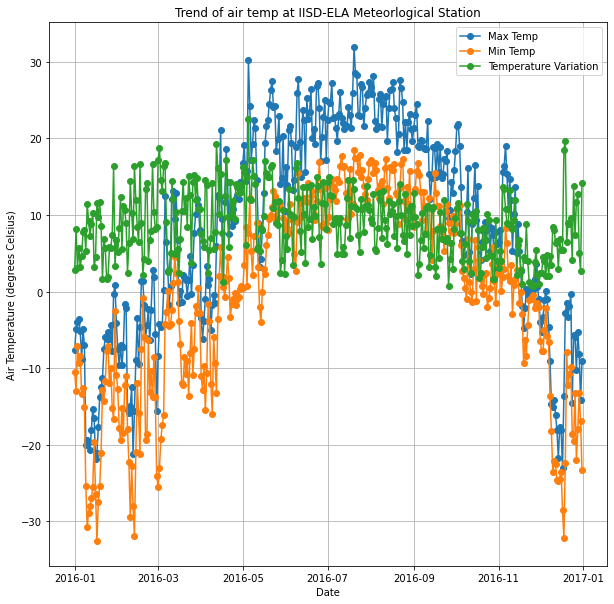

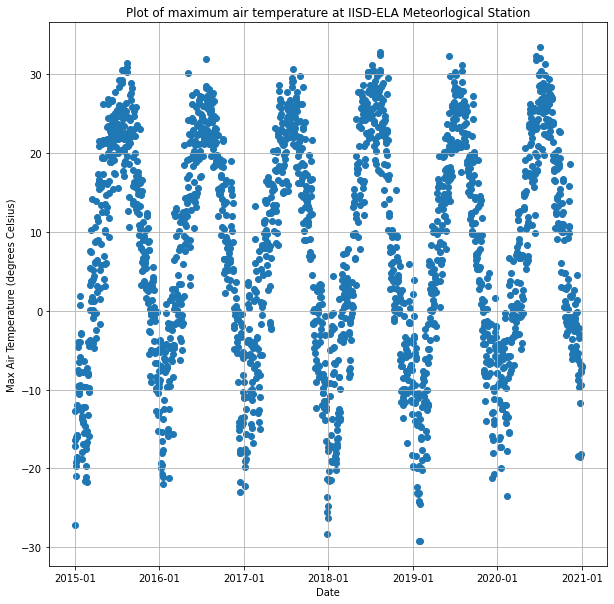

In [30]:
airtemp = read_data_airtemp()
create_plots_airtemp(airtemp, 2016)
create_indev_plots(airtemp, 'scatter', 'max_temp', 2016)